## Uniform Time Course process output comparisons

In [1]:
import sys
import os
from tempfile import mkdtemp

import numpy as np
from process_bigraph import Composite
from process_bigraph.experiments.parameter_scan import RunProcess


sys.path.insert(0, '..')

In [2]:


from biosimulator_processes.io import read_report_outputs
from biosimulator_processes.helpers import plot_utc_outputs, plot_ode_output_data

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [3]:
from biosimulator_processes.processes.amici_process import UtcAmici
from biosimulator_processes.processes.copasi_process import UtcCopasi

In [4]:
omex_dir = '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator'
omex_fp = omex_dir + '.omex'
sbml_fp = os.path.join(omex_dir, 'BIOMD0000000012_url.xml')
sedml_fp = os.path.join(omex_dir, 'simulation.sedml')
reports_path = os.path.join(omex_dir, 'reports.h5')

Configure and create an Amici UTC instance using just the archive filepath.

In [5]:
utc_amici = UtcAmici(config={'model': {'model_source': omex_dir + '.omex'}})

2024-05-31 17:44:40.241 - amici.sbml_import - INFO - Finished importing SBML                         (4.54E-02s)
2024-05-31 17:44:40.295 - amici.sbml_import - INFO - Finished processing SBML observables            (5.12E-02s)
2024-05-31 17:44:40.300 - amici.sbml_import - INFO - Finished processing SBML event observables      (5.83E-07s)
2024-05-31 17:44:40.325 - amici.de_model - INFO - Finished computing xdot                            (4.21E-03s)
2024-05-31 17:44:40.332 - amici.de_model - INFO - Finished computing x0                              (2.78E-03s)
2024-05-31 17:44:40.351 - amici.de_model - INFO - Finished computing w                               (1.62E-02s)
2024-05-31 17:44:41.162 - amici.de_export - INFO - Finished generating cpp code                      (8.06E-01s)
2024-05-31 17:44:49.839 - amici.de_export - INFO - Finished compiling cpp code                       (8.67E+00s)


In [6]:
# t range parameters set via sedml introspection within archive contents:
utc_amici.t[0], utc_amici.t[-1], utc_amici.duration, utc_amici.step_size, utc_amici.num_steps

(400.0, 1000.0, 1000, 1.0, 601)

In [7]:
# you can verify this time config against the SEDML file
!cat ./examples/sbml-core/Elowitz-Nature-2000-Repressilator/simulation.sedml

cat: ./examples/sbml-core/Elowitz-Nature-2000-Repressilator/simulation.sedml: No such file or directory


In [8]:
# run the amici utc simulation with the interface's update method:
amici_results = utc_amici.update()

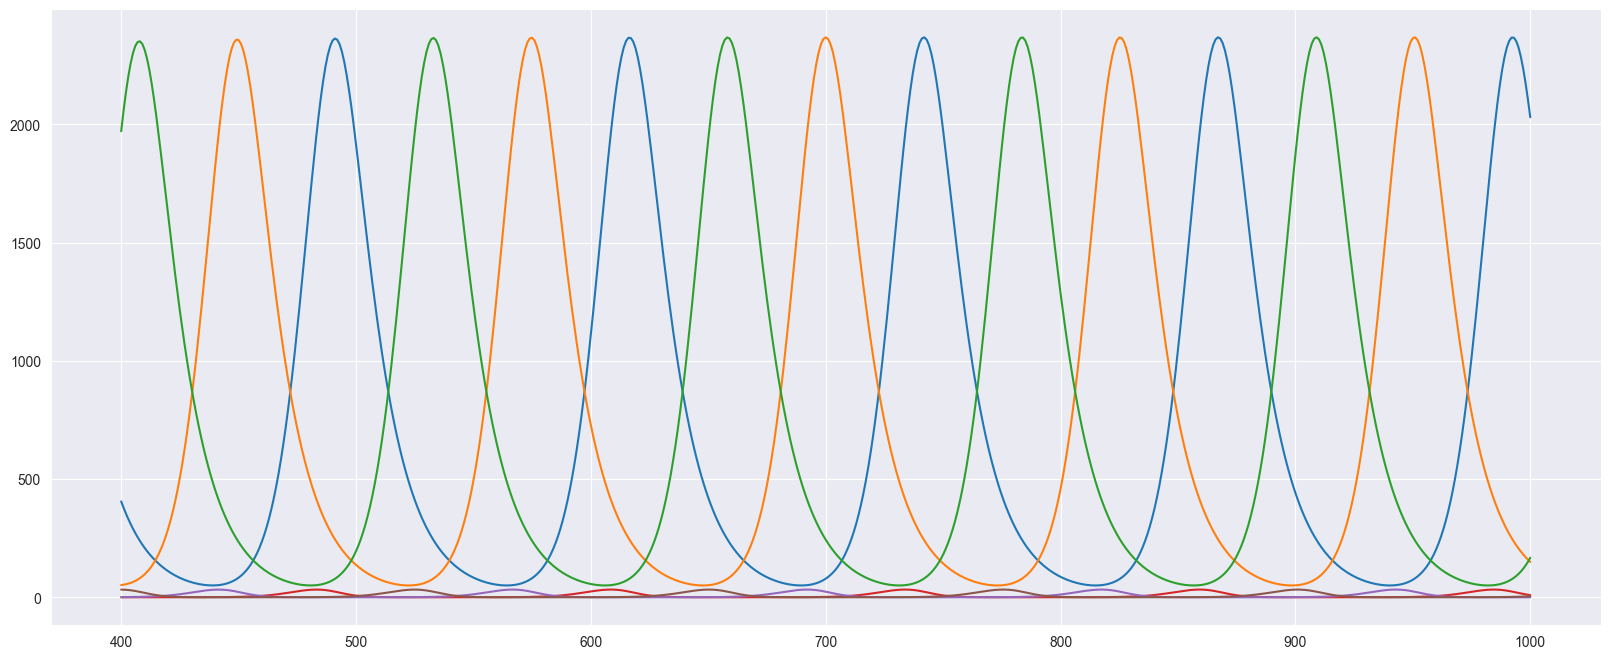

In [9]:
# use built-in plot to plot results
utc_amici.plot_results()

Create a `UtcTellurium` instance as above

In [10]:
from biosimulator_processes.processes.tellurium_process import UtcTellurium


utc_tellurium = UtcTellurium(config={'model': {'model_source': omex_dir + '.omex'}})

In [11]:
tellurium_results = utc_tellurium.update()

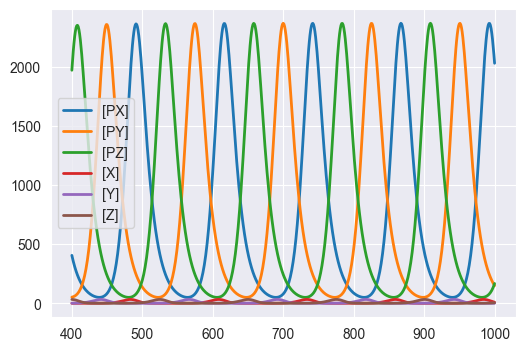

In [12]:
utc_tellurium.plot_results()

Create a `UtcCopasi` instance and run the same

In [23]:
tellurium_results['time'][-1]

1000.0

In [14]:
utc_copasi = UtcCopasi(config={'model': {'model_source': omex_dir + '.omex'}})

In [15]:
copasi_results = utc_copasi.update()

In [24]:
copasi_results['time'][-1]

1000.0

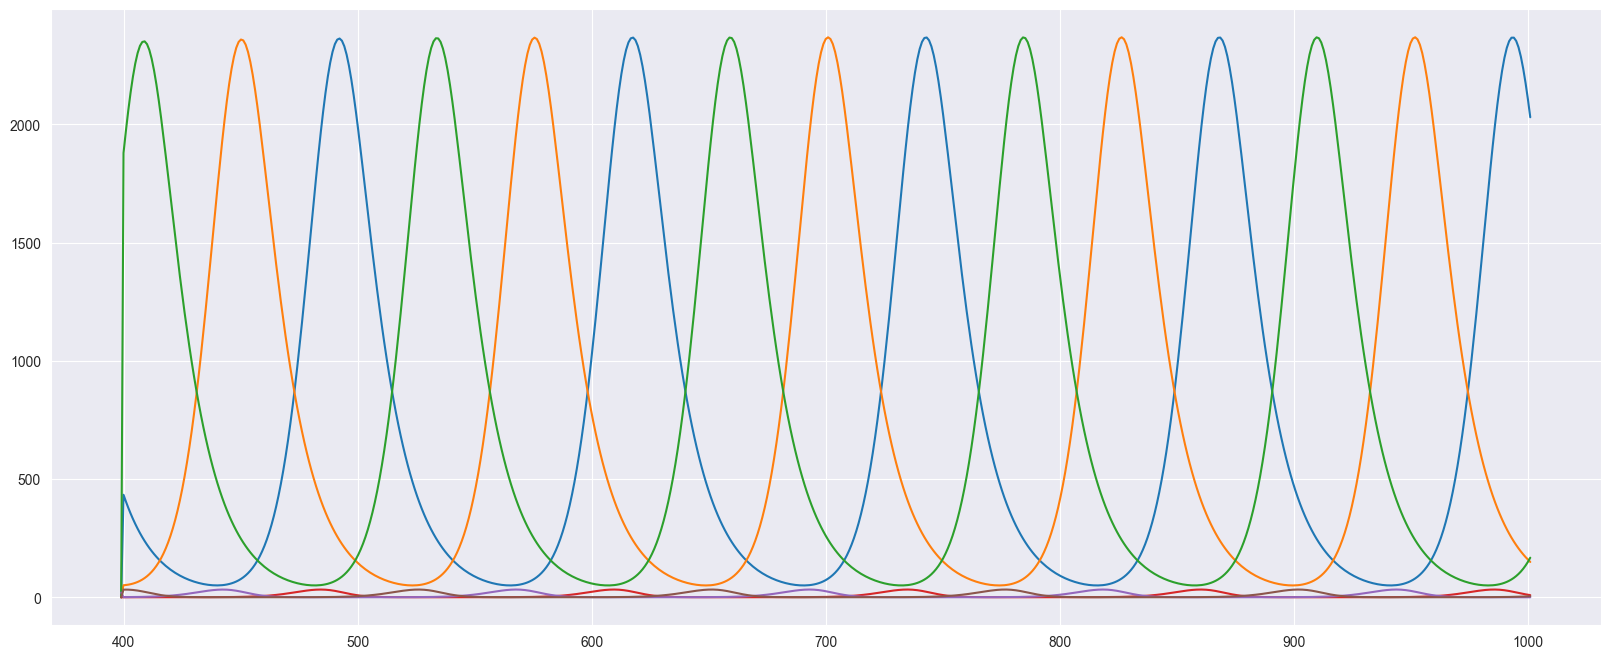

In [18]:
plot_utc_outputs(data=copasi_results, t=np.append(utc_copasi.t, utc_copasi.t[-1] + utc_copasi.step_size))

<Axes: xlabel='Time'>

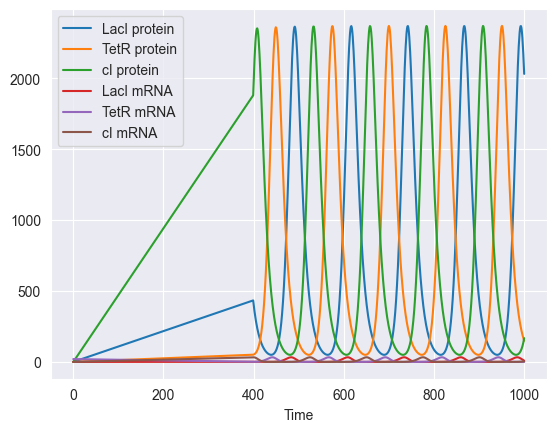

In [27]:
utc_copasi.plot_results()

Finally, optionally generate a "ground truth" which we include in the comparison. The default source for ground-truth data is via uploading an omex archive as model source. The report outputs must be included in the archive.

In [ ]:
# Generate comparison matrix from ground truth
from biosimulator_processes.api.compare import write_utc_comparison_reports
from biosimulator_processes.io import standardize_report_outputs

In [ ]:
report_results = standardize_report_outputs(reports_path)

In [ ]:
print(f"copasi result keys: {copasi_results['floating_species'].keys()}\nTellurium result keys: {tellurium_results['floating_species'].keys()}\nAmici Result keys: {amici_results['floating_species'].keys()}\nGround truth report keys: {report_results['floating_species'].keys()}")

In [ ]:
plot_ode_output_data(report_results, simulator_name='Ground Truth')

Generate a series of comparisons for each species and save to a given dir

In [ ]:
copasi_results['floating_species']['PX'].shape, copasi_results['time'][0]

In [ ]:
utc_copasi.step_size

In [ ]:
copasi_results['floating_species']['PX'].shape, utc_copasi.t.shape

In [ ]:
write_utc_comparison_reports(
    save_dir='../test_outputs/repressilator-utc-comparison',
    copasi_results=copasi_results,
    tellurium_results=tellurium_results,
    amici_results=amici_results,
    ground_truth_results=report_results,
    sbml_species_mapping=utc_copasi.sbml_species_mapping,
    method='mse')

In [ ]:
utc_copasi.t[-1]

In [ ]:
from basico import *
import numpy as np 


m = load_model(sbml_fp)
duration = 1000.0
output_start = 400.0
initial = 0.0
points = 601
t = np.linspace(output_start, duration, points)
outs = [k for k in utc_tellurium.sbml_species_mapping.keys()]
outs.append('Time')

tc = run_time_course_with_output(start_time=initial, 
                                 duration=duration,
                                 values=t,
                                 model=m, 
                                 output_selection=outs)

In [ ]:
t = np.linspace(output_start, duration, points)

In [ ]:
t.shape

In [ ]:
tc[['Time']].shape, t[0]

In [ ]:
tc.plot()

In [ ]:
utc_copasi.t[1] - utc_copasi.t[0]

In [ ]:
utc_copasi.t[-1], utc_copasi.t.shape

In [ ]:
t = np.linspace(0, 1000, 1000)
tc3 = run_time_course_with_output(
    start_time=0, 
    duration=1000, 
    values=t,
    output_selection=outs)


tc3[400: 1000]


import seaborn as sns 



In [ ]:
tc3[400: 1000].shape

In [ ]:
tc